## Setup and Data Loading
Here, we load the necessary libraries and the dataset.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Load the data
df = pd.read_csv("cause_of_deaths.csv")


## Visualization
We visualize the trend of deaths due to the top 5 causes in the USA from 1990 to 2019.

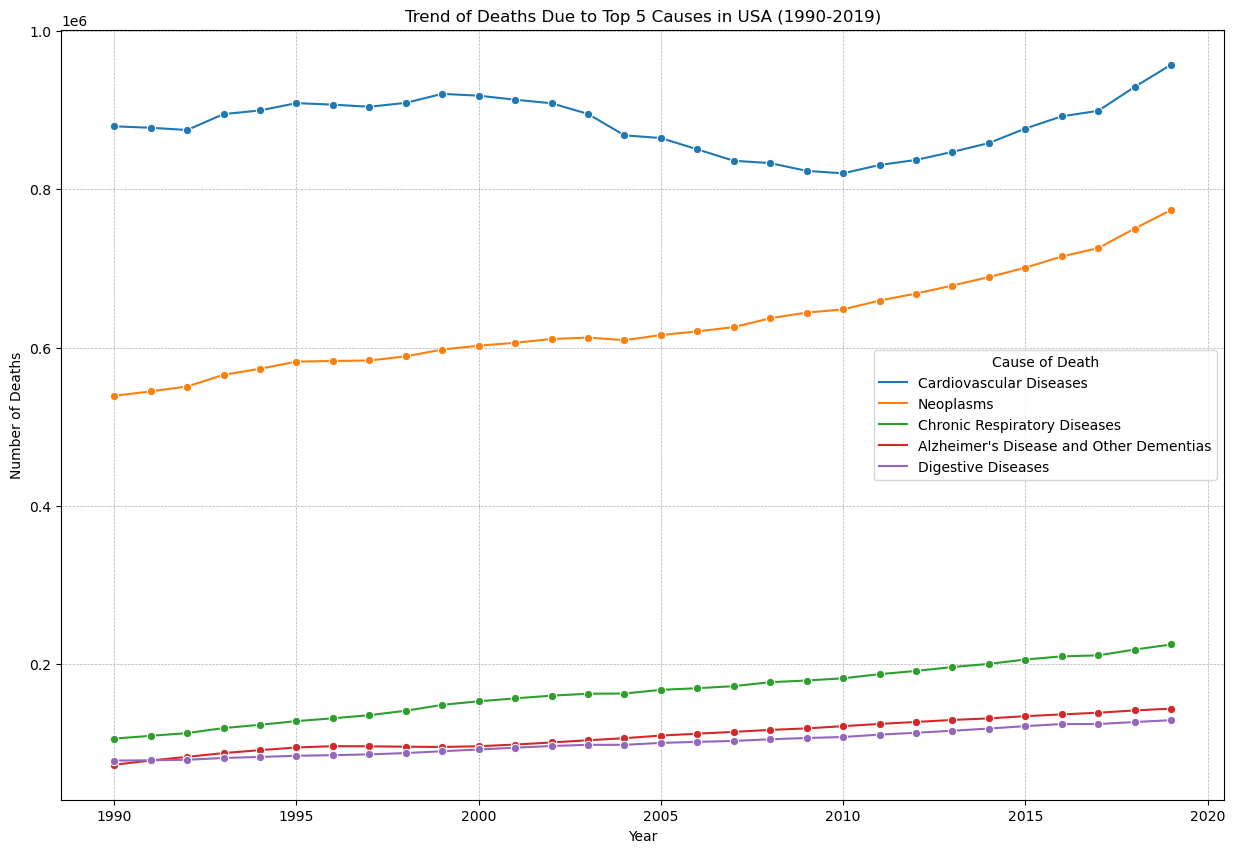

In [2]:

# Visualization: Trend of Deaths Due to Top 5 Causes in USA (1990-2019)
us_top_5_causes = df[df['Country/Territory'] == 'United States'].drop(columns=['Country/Territory', 'Code', 'Year']).sum().nlargest(5).index.tolist()
us_top_5_data = df[df['Country/Territory'] == 'United States'][['Year'] + us_top_5_causes]
us_top_5_data_melted = us_top_5_data.melt(id_vars='Year', var_name='Cause', value_name='Number of Deaths')

plt.figure(figsize=(15, 10))
sns.lineplot(data=us_top_5_data_melted, x='Year', y='Number of Deaths', hue='Cause', marker='o', palette='tab10')
plt.title('Trend of Deaths Due to Top 5 Causes in USA (1990-2019)')
plt.ylabel('Number of Deaths')
plt.xlabel('Year')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Cause of Death')
plt.show()


## Machine Learning
We prepare the data to predict deaths due to Cardiovascular Diseases for the USA.

In [ ]:

# Machine Learning: Predicting deaths due to Cardiovascular Diseases for USA

# Data preparation
us_data = df[df['Country/Territory'] == "United States"][['Year', 'Cardiovascular Diseases']]
X = us_data[['Year']]
y = us_data['Cardiovascular Diseases']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Linear Regression
Using simple linear regression, we fit the model and predict on the test set. The RMSE for the linear regression model is displayed below.

In [ ]:

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
rmse_lr


### Polynomial Regression
Using polynomial regression of degree 2, we fit the model and predict on the test set. The RMSE for the polynomial regression model is displayed below.

In [ ]:

# Polynomial Regression
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X_train, y_train)
y_pred_poly = polyreg.predict(X_test)
rmse_poly = mean_squared_error(y_test, y_pred_poly, squared=False)
rmse_poly


### Random Forest Regression
Using random forest regression, we fit the model and predict on the test set. The RMSE for the random forest model is displayed below.

In [ ]:

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
rmse_rf


### Support Vector Regression
Using support vector regression with RBF kernel, we fit the model and predict on the test set. The RMSE for the SVR model is displayed below.

In [ ]:

# Support Vector Regression
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
rmse_svr = mean_squared_error(y_test, y_pred_svr, squared=False)
rmse_svr
